# Problemas de Difusión

Nos encontramos estudiando la ecuacion de calor en una dimension espacial:

$$
\begin{equation}
\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}
\end{equation}
$$

donde $\alpha$ es la difusividad termica y $T$ es la temperatura.

En el cuaderno anterior, hemos revisado la solucion numerica de la ecuacion de difusion 1D con un esquema tipo *forward-time, centered-space*: un esquema **explicito**. Que significa esto?  

La solucion para $T$ en el paso de tiempo $t^{n+1}$ ha sido calculada empleando diferentes combinaciones de valores de $T$ provenientes del paso de tiempo *previo* $t^n$. Disponemos asi de un conocimiento completo de las partes que alimentan la solucion actualizada en cada punto espacial.  

Los metodos **Implicitos** trabajan en forma diferente: emplearemos mas datos correspondientes al "futuro" en la solucion actualizada, incluyendo varios valores de $T$ en $t^{n+1}$. 

En el cuaderno 1, tratamos dos desventajas de los metodos explicitos: (1) los efectos de borde quedan rezagados por un paso de tiempo; (2) los requerimientos de estabilidad restringen el paso de tiempo a valores muy pequeños. Ambos aspectos son resueltos por los metodos implicitos!

## Esquemas Implicitos

Procuremos combinar el paso de tiempo de Euler con una evaluacion de la derivada espacial empleando la solucion *actualizada* en $t^{n+1}$. La forma discretizada de la ecuacion es ahora como sigue:

$$
\begin{equation}
\frac{T_{i}^{n+1}-T_{i}^{n}}{\Delta t}=\alpha\frac{T_{i+1}^{n+1}-2T_{i}^{n+1}+T_{i-1}^{n+1}}{\Delta x^2}
\end{equation}
$$

A continuacion se ilustra el *stencil* para esta discretizacion:

![stencil-implicitcentral](./figuras/stencil-implicitcentral.png)
#### *Stencil* del esquema implicito centrado.

A partir del paso de tiempo previo, solo conocemos $T_i^{n}$, pero que hay acerca de $T_i^{n+1}$, $T_{i-1}^{n+1}$ y $T_{i+1}^{n+1}$?

Comencemos ubicando aquello que *conocemos* en el lado derecho de la ecuacion y aquello que *desconocemos* en el lado izquierdo:

$$
\begin{equation}
-T_{i-1}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{i}^{n+1} - T_{i+1}^{n+1} = T_{i}^{n}\frac{\Delta x^2}{\alpha\Delta t}
\end{equation}
$$

Para $i=1$:

$$
\begin{equation}
-T_{0}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{1}^{n+1} - T_{2}^{n+1} = T_{1}^{n}\frac{\Delta x^2}{\alpha\Delta t}
\end{equation}
$$

Para $i=2$:

$$
\begin{equation}
-T_{1}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{2}^{n+1} - T_{3}^{n+1} = T_{2}^{n}\frac{\Delta x^2}{\alpha\Delta t}
\end{equation}
$$

Para $i=3$:

$$
\begin{equation}
-T_{2}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{3}^{n+1} - T_{4}^{n+1} = T_{3}^{n}\frac{\Delta x^2}{\alpha\Delta t}
\end{equation}
$$

A continuacion mostramos el elemento comun entre las ecuaciones:

<img src="./figuras/implicit_formula.svg" style="width: 400px;"/>

Vemos que $T_{i}^{n+1}$ aparece ademas en las ecuaciones para $T_{i-1}^{n+1}$ y $T_{i+1}^{n+1}$. Deberiamos tener suficientes ecuaciones si repetimos el proceso para todos los valores de $i$ al mismo nivel de tiempo. De hecho, es posible construir un sistema lineal de ecuaciones para los valores incognita $T_{i}^{n+1}$ en nuestra grilla espacial.

### Tratamiento de las condiciones frontera 

Consideremos el ejemplo del cuaderno anterior en el cual empleamos una BC tipo Dirichlet en $x=0$ y una BC tipo Neumann en $x=1$, discretizando con $N$ puntos de grilla.  

El valor $T_0^{n+1}$ se conoce para cada paso de tiempo a partir de la BC, por lo tanto colocando los terminos incognita del lado izquierdo de la ecuacion y los valores conocidos del lado derecho, resulta la siguiente expresion para $i=1$:

$$
\begin{equation}
-T_{2}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{1}^{n+1} = T_{1}^{n}\frac{\Delta x^2}{\alpha\Delta t} + T_{0}^{n+1}
\end{equation}
$$

Para $i=N-2$, resulta la expresion siguiente:

$$
\begin{equation}
-T_{N-3}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{N-2}^{n+1} - T_{N-1}^{n+1} = T_{N-2}^{n}\frac{\Delta x^2}{\alpha\Delta t}
\end{equation}
$$

La BC tipo Neumann discretizada en el borde derecho de la barra es:

$$
\begin{equation}
\frac{T^{n}_{N-1} - T^{n}_{N-2}}{\Delta x} = q
\end{equation}
$$

En el paso de tiempo $n+1$ la escribimos:

$$
\begin{equation}
\frac{T^{n+1}_{N-1} - T^{n+1}_{N-2}}{\Delta x} = q
\end{equation}
$$

Introduciendo la BC tipo Neumann en la ecuacion para $i=N-2$ se obtiene:

$$
\begin{equation}
    -T_{N-3}^{n+1} + \left( 1 + \frac{\Delta x^2}{\alpha\Delta t} \right) T_{N-2}^{n+1} = T_{N-2}^{n} \frac{\Delta x^2}{\alpha\Delta t} + \Delta x q
\end{equation}
$$

Podemos ahora escribir el sistema de ecuaciones lineal en forma matricial:

$$
[A][x] = [b]+[b]_{b.c.}
$$

donde la matriz de coeficientes $[A]$ es *esparsa* tri-diagonal. Escribimos aqui el sistema expandido, de modo que podemos ver la estructura de la matriz, con $\sigma=\frac{\alpha\Delta t}{\Delta x^2}$:

$$
\begin{align}
    \left[
        \begin{array}{cccccc}
            \left( 2 + \frac{1}{\sigma} \right) & -1 & 0 & \cdots & & 0 \\
            -1 & \left( 2 + \frac{1}{\sigma} \right) & -1 & 0 & \cdots & 0 \\
            0 & & \ddots & & & \vdots \\
            \vdots & & & & \left( 2 + \frac{1}{\sigma} \right) & \\
            0 & \cdots & & & -1 & \left( 1 + \frac{1}{\sigma} \right)
        \end{array}
    \right] \cdot 
    \left[
        \begin{array}{c} 
            T_1^{n+1} \\
            T_2^{n+1} \\
            \vdots \\ \\
            T_{N-2}^{n+1}
        \end{array}
    \right] =
    \left[
        \begin{array}{c} 
            T_1^n \frac{1}{\sigma} \\
            T_2^{n} \frac{1}{\sigma} \\
            \vdots \\ \\
            T_{N-2}^{n} \frac{1}{\sigma}
        \end{array}
    \right] +
    \begin{bmatrix}
        T_0^{n+1} \\
        0 \\
        \vdots \\
        0 \\
        q\Delta x
    \end{bmatrix}
\end{align}
$$

Notamos que la BC tipo Dirichlet solo agrega un termino al lado derecho del sistema, mientras que la BC tipo Neumann agrega un termino al lado derecho y modifica la matriz $[A]$.

### Configuracion del Problema

Recuperemos el caso visto en el cuaderno 1: disponemos de una barra de grafito, con [difusividad termica](http://en.wikipedia.org/wiki/Thermal_diffusivity) $\alpha=1.22\times10^{-3} {\rm m}^2/{\rm s}$, longitud $L=1{\rm m}$, y temperatura $T=100^{\circ}{\rm C}$ en el borde izquierdo, $x=0$. Inicialmente tenemos toda la barra a $T=0^{\circ}{\rm C}$. Calcularemos la evolucion de la temperatura a lo largo de la barra.

In [14]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [15]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [16]:
# Set parameters.
L = 1.0  # length of the rod
nx = 51  # number of locations on the rod
dx = L / (nx - 1)  # distance between two consecutive locations
alpha = 1.22e-3  #  thermal diffusivity of the rod
q = 0.0  # temperature gradient on the right side of the rod

# Define the locations along the rod.
x = numpy.linspace(0.0, L, num=nx)

# Set the initial temperature along the rod.
T0 = numpy.zeros(nx)
T0[0] = 100.0

### Solucion del sistema lineal

Necesitaremos resolver el sistema de ecuaciones lineal escrito arriba para avanzar la solucion en tiempo.

A partir del modulo `scipy.linalg`, importemos `solve`: una funcion que resuelve sistemas lineales. Exploremos la documentacion de [`scipy.linalg`](https://docs.scipy.org/doc/scipy/reference/linalg.html). Requeriremos definir nuestras propias funciones para generar la matriz de coeficientes y el lado derecho del sistema lineal.

In [17]:
from scipy import linalg

In [18]:
def lhs_operator(N, sigma):
    """
    Computes and returns the implicit operator
    of the system for the 1D diffusion equation.
    We use backward Euler method, Dirichlet condition
    on the left side of the domain and zero-gradient
    Neumann condition on the right side.
    
    Parameters
    ----------
    N : integer
        Number of interior points.
    sigma : float
        Value of alpha * dt / dx**2.
    
    Returns
    -------
    A : numpy.ndarray
        The implicit operator as a 2D array of floats
        of size N by N.
    """
    # Setup the diagonal of the operator.
    D = numpy.diag((2.0 + 1.0 / sigma) * numpy.ones(N))
    # Setup the Neumann condition for the last element.
    D[-1, -1] = 1.0 + 1.0 / sigma
    # Setup the upper diagonal of the operator.
    U = numpy.diag(-1.0 * numpy.ones(N - 1), k=1)
    # Setup the lower diagonal of the operator.
    L = numpy.diag(-1.0 * numpy.ones(N - 1), k=-1)
    # Assemble the operator.
    A = D + U + L
    return A

In [19]:
def rhs_vector(T, sigma, qdx):
    """
    Computes and returns the right-hand side of the system
    for the 1D diffusion equation, using a Dirichlet condition
    on the left side and a Neumann condition on the right side.
    
    Parameters
    ----------
    T : numpy.ndarray
        The temperature distribution as a 1D array of floats.
    sigma : float
        Value of alpha * dt / dx**2.
    qdx : float
        Value of the temperature flux at the right side.
    
    Returns
    -------
    b : numpy.ndarray
        The right-hand side of the system as a 1D array of floats.
    """
    b = T[1:-1] / sigma
    # Set Dirichlet condition.
    b[0] += T[0]
    # Set Neumann condition.
    b[-1] += qdx
    return b

A continuacion, definiremos una funcion que avanza en tiempo empleando el esquema implicito centrado espacialmente.

In [20]:
def btcs_implicit(T0, nt, dt, dx, alpha, q):
    """
    Computes and returns the temperature along the rod
    after a given number of time steps.
    
    The function uses Euler implicit in time,
    central differencing in space, a Dirichlet condition
    on the left side, and a Neumann condition on the
    right side.
    
    Parameters
    ----------
    T0 : numpy.ndarray
        The initial temperature distribution as a 1D array of floats.
    nt : integer
        Number of time steps to compute.
    dt : float
        Time-step size.
    dx : float
        Distance between two consecutive locations.
    alpha : float
        Thermal diffusivity of the rod.
    q : float
        Value of the temperature gradient on the right side.
    
    Returns
    -------
    T : numpy.ndarray
        The temperature distribution as a 1D array of floats.
    """
    sigma = alpha * dt / dx**2
    # Create the implicit operator of the system.
    A = lhs_operator(len(T0) - 2, sigma)
    # Integrate in time.
    T = T0.copy()
    for n in range(nt):
        # Generate the right-hand side of the system.
        b = rhs_vector(T, sigma, q * dx)
        # Solve the system with scipy.linalg.solve.
        T[1:-1] = linalg.solve(A, b)
        # Apply the Neumann boundary condition.
        T[-1] = T[-2] + q * dx
    return T

Resolvemos el sistema lineal para cada paso de tiempo, sin embargo la matriz $A$ **no** cambia. Por lo tanto, podemos generarla inicialmente y luego emplearla para todos los pasos de tiempo!

In [21]:
# Set the time-step size based on CFL limit.
sigma = 0.5
dt = sigma * dx**2 / alpha  # time-step size
nt = 1000  # number of time steps to compute

# Compute the temperature along the rod.
T = btcs_implicit(T0, nt, dt, dx, alpha, q)

Ahora grafiquemos la solucion:

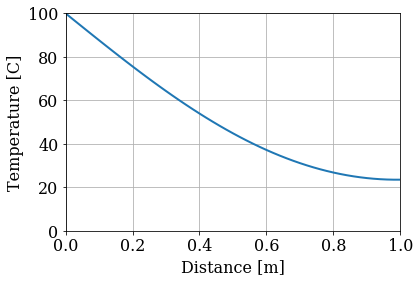

In [22]:
# Plot the temperature along the rod.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, T, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);

El resultado luce similar al obtenido mediante el esquema **explicito** tipo *forward-time, centered-space* con $\alpha\frac{\Delta t}{\Delta x^2} = \frac{1}{2}$. 

Sin embargo, procuremos utilizar $\alpha\frac{\Delta t}{\Delta x^2} = 5$, lo cual viola la condicion de estabilidad del esquema *explicito*:

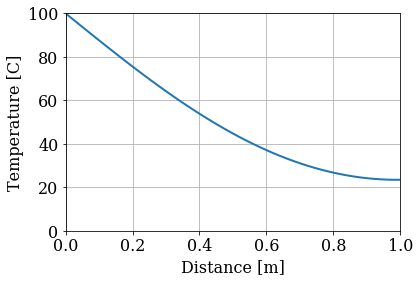

In [23]:
# Increase the CFL number.
sigma = 5.0
dt = sigma * dx**2 / alpha  # time-step size
nt = 100  # number of time steps to compute

# Compute the temperature along the rod.
T = btcs_implicit(T0, nt, dt, dx, alpha, q)

# Plot the temperature along the rod.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, T, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);

<div class="alert alert-block alert-success">
<b>La solucion NO HA EXPLOTADO!</b>
    
We were not able to use such a large time step with the explicit scheme. You can try out other values of `sigma` and you'll get a stable solution. In fact, this is an *unconditionally stable* scheme—the most valuable feature of implicit methods is that they give stable solutions without a constraint on the choice of time step. 

Using the implicit scheme, we can always advance in time using larger time steps. But each time step requires the solution of a linear system, which is computationally expensive. This is the trade-off between explicit and implicit methods. 
To experiment further, set different values of the Neumann boundary flux and see if the solution behaves as you expect.
</div>    

##### A word of warning

<div class="alert alert-block alert-warning">
Implicit methods allow you to use significantly larger time steps, because they are not subject to stability constraints. But that doesn't mean you can use just <i>any</i> large time step! Remember that Euler's method is a first-order method, so the <i>accuracy</i> gets worse as you increase the time step, in direct proportion. In fact, you can lose the ability to capture the correct physics if your time step is too large. Numerical stability does not imply accuracy!
</div>    

##### Dig deeper

<div class="alert alert-block alert-info">
You see how matrix `A` is mostly full of zeros?  We call such a matrix <b>sparse</b>, and there are many ways to make more efficient calculations taking advantage of their particular structure. First of all, you can optimize the memory usage. Check out SciPy's <a href="https://docs.scipy.org/doc/scipy/reference/sparse.html">sparse-matrix storage formats</a>: you don't need too store $(N-2)^2$ elements! For example, a `coo_matrix` format stores only $3*N_\text{nonzero}$, where $N_\text{nonzero}$ is the number of non-zero elements in `A`. Make sure to explore this topic a little more. It's an important topic in numerical PDEs.
</div>    

---
###### The cell below loads the style of the notebook

In [24]:
from IPython.core.display import HTML
css_file = '.././styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())